In [1]:
import os
import json
from data.preprocessing import load_rizhiyi_json_file_as_dataframe
import pandas as pd

In [2]:
root_dir = "./../../../data/riviyi_test"
filename = "o2_process_load_percent.json"

log_data:pd.DataFrame = load_rizhiyi_json_file_as_dataframe(root_dir, filename)

log_data.head()
    

,kpi_id,kpiName,time_interval_ms,endpoint,appname,service,name,anonymity,context_id,value,ts,timestamp
0,3b18bacd588cc1f0c68615f0deb2f3d4,负载占比,60000,oppf_esb_2_10.255.34.38,kpi_point,集群负载.能力开放.2,负载占比,0,0,14.217,2020-09-30:23:59:00.000,1601481580000
1,3b18bacd588cc1f0c68615f0deb2f3d4,负载占比,60000,oppf_esb_2_10.255.34.38,kpi_point,集群负载.能力开放.2,负载占比,0,0,14.110,2020-09-30:23:58:00.000,1601481520000
2,3b18bacd588cc1f0c68615f0deb2f3d4,负载占比,60000,oppf_esb_2_10.255.34.38,kpi_point,集群负载.能力开放.2,负载占比,0,0,13.964,2020-09-30:23:57:00.000,1601481460000
3,3b18bacd588cc1f0c68615f0deb2f3d4,负载占比,60000,oppf_esb_2_10.255.34.38,kpi_point,集群负载.能力开放.2,负载占比,0,0,13.219,2020-09-30:23:56:00.000,1601481400000
4,3b18bacd588cc1f0c68615f0deb2f3d4,负载占比,60000,oppf_esb_2_10.255.34.38,kpi_point,集群负载.能力开放.2,负载占比,0,0,13.613,2020-09-30:23:55:00.000,1601481340000


In [3]:
log_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127716 entries, 0 to 127715
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   kpi_id            127716 non-null  object 
 1   kpiName           127716 non-null  object 
 2   time_interval_ms  127716 non-null  object 
 3   endpoint          127716 non-null  object 
 4   appname           127716 non-null  object 
 5   service           127716 non-null  object 
 6   name              127716 non-null  object 
 7   anonymity         127716 non-null  int64  
 8   context_id        127716 non-null  int64  
 9   value             127716 non-null  float64
 10  ts                127716 non-null  object 
 11  timestamp         127716 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 11.7+ MB


In [4]:
log_data['value'].isnull().sum()

0

In [5]:
sum(log_data['value']==0.0)

0

In [6]:
max(log_data['timestamp']), min(log_data['timestamp'])

(1601481580000, 1593532912000)

检查原始数据的timestamp是否连续

In [7]:
import numpy as np
contious_timestamp = np.linspace(min(log_data['timestamp']), max(log_data['timestamp']), len(log_data['timestamp']))
sum(contious_timestamp==log_data['timestamp'])

0

把数据根据timestamp升序排列

In [8]:
log_data.sort_values('timestamp', inplace=True)
log_data.head()

,kpi_id,kpiName,time_interval_ms,endpoint,appname,service,name,anonymity,context_id,value,ts,timestamp
127715,3b18bacd588cc1f0c68615f0deb2f3d4,负载占比,60000,oppf_esb_2_10.255.34.38,kpi_point,集群负载.能力开放.2,负载占比,0,0,23.369,2020-07-01:00:01:00.000,1593532912000
127714,3b18bacd588cc1f0c68615f0deb2f3d4,负载占比,60000,oppf_esb_2_10.255.34.38,kpi_point,集群负载.能力开放.2,负载占比,0,0,24.000,2020-07-01:00:02:00.000,1593532972000
127713,3b18bacd588cc1f0c68615f0deb2f3d4,负载占比,60000,oppf_esb_2_10.255.34.38,kpi_point,集群负载.能力开放.2,负载占比,0,0,27.787,2020-07-01:00:03:00.000,1593533032000
127712,3b18bacd588cc1f0c68615f0deb2f3d4,负载占比,60000,oppf_esb_2_10.255.34.38,kpi_point,集群负载.能力开放.2,负载占比,0,0,23.506,2020-07-01:00:04:00.000,1593533092000
127711,3b18bacd588cc1f0c68615f0deb2f3d4,负载占比,60000,oppf_esb_2_10.255.34.38,kpi_point,集群负载.能力开放.2,负载占比,0,0,24.867,2020-07-01:00:05:00.000,1593533152000


In [9]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

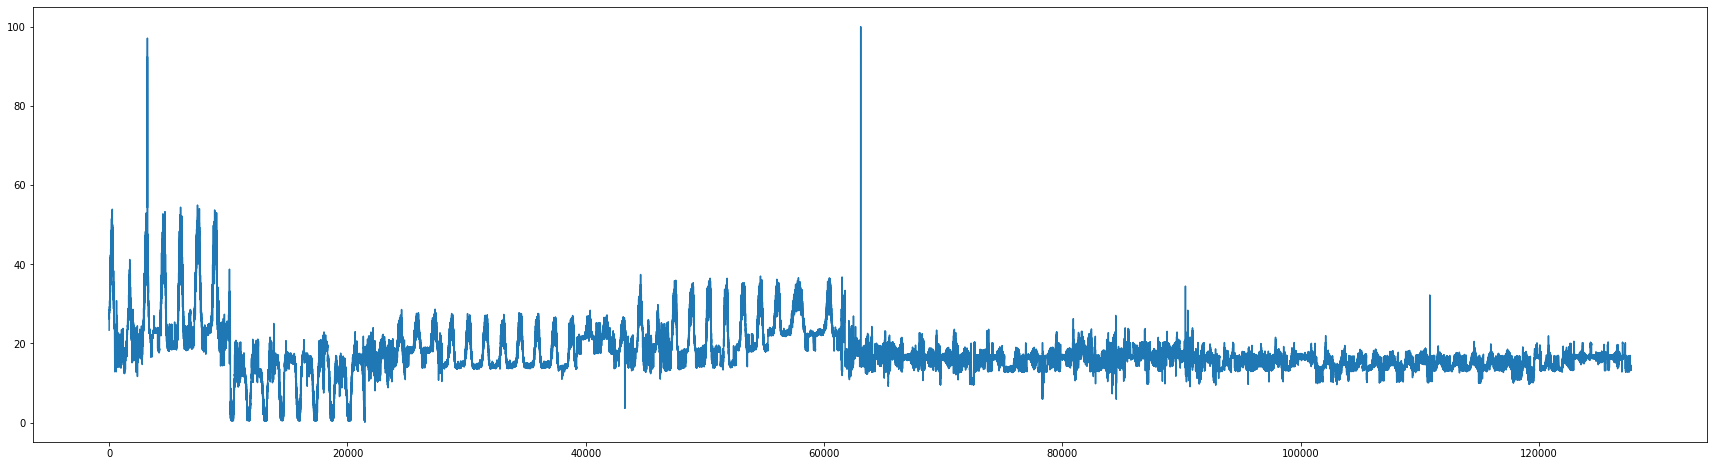

In [15]:
plt.figure(figsize=(30, 8))
plt.plot(np.arange(len(log_data['value'])), log_data['value'])
plt.show()

0